# **SUPPORT VECTOR MACHINES** <font color= green> 
## PREDICTING THE WEATHER USING SVM!
### REQUIRED LIBRARIES:

In [34]:
import numpy    #for linear algebra
import pandas   #for processing data
import seaborn  #for plotting graphs
import matplotlib.pyplot as plt
import scipy    #for stasistical purposes
from scipy import stats 
import sklearn  #Machine Learning Algorithms
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

### **DATA USED**:

In [35]:
data = pandas.read_csv(".\\weatherseattle.csv")
data.head()
print(data)

            Date  Precipitation  Maximum Temp  Minimum Temp  wind  weather
0     01-01-2012            0.0          12.8           5.0   4.7  drizzle
1     02-01-2012           10.9          10.6           2.8   4.5     rain
2     03-01-2012            0.8          11.7           7.2   2.3     rain
3     04-01-2012           20.3          12.2           5.6   4.7     rain
4     05-01-2012            1.3           8.9           2.8   6.1     rain
...          ...            ...           ...           ...   ...      ...
1456  27-12-2015            8.6           4.4           1.7   2.9     rain
1457  28-12-2015            1.5           5.0           1.7   1.3     rain
1458  29-12-2015            0.0           7.2           0.6   2.6      fog
1459  30-12-2015            0.0           5.6          -1.0   3.4      sun
1460  31-12-2015            0.0           5.6          -2.1   3.5      sun

[1461 rows x 6 columns]


In [36]:
data.shape

(1461, 6)

### **DATA EXPLORATION**

In [37]:
#seaborn.countplot("weather")
countrain=len(data[data.weather=="rain"])
countsun=len(data[data.weather=="sun"])
countdrizzle=len(data[data.weather=="drizzle"])
countsnow=len(data[data.weather=="snow"])
countfog=len(data[data.weather=="fog"])
print("Percent of Rain:",(countrain/(len(data.weather))*100),"%")
print("Percent of Sun:",(countsun/(len(data.weather))*100),"%")
print("Percent of Drizzle:",(countdrizzle/(len(data.weather))*100),"%")
print("Percent of Snow:",(countsnow/(len(data.weather))*100),"%")
print("Percent of Fog:",(countfog/(len(data.weather))*100),"%")

Percent of Rain: 43.87405886379192 %
Percent of Sun: 43.80561259411362 %
Percent of Drizzle: 3.6276522929500343 %
Percent of Snow: 1.7796030116358659 %
Percent of Fog: 6.913073237508556 %


From the data, the set contains higher amount of data with the weather detail of ***Rain and Sun*** and it also have some additionals like ***drizzle, snow and fog***.

### **NUMERICAL VARIABLES:**

In [38]:
data[["Precipitation","Maximum Temp","Minimum Temp","wind"]].describe()

,Precipitation,Maximum Temp,Minimum Temp,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


**Histogram** of the above data::

<AxesSubplot: xlabel='wind', ylabel='Count'>

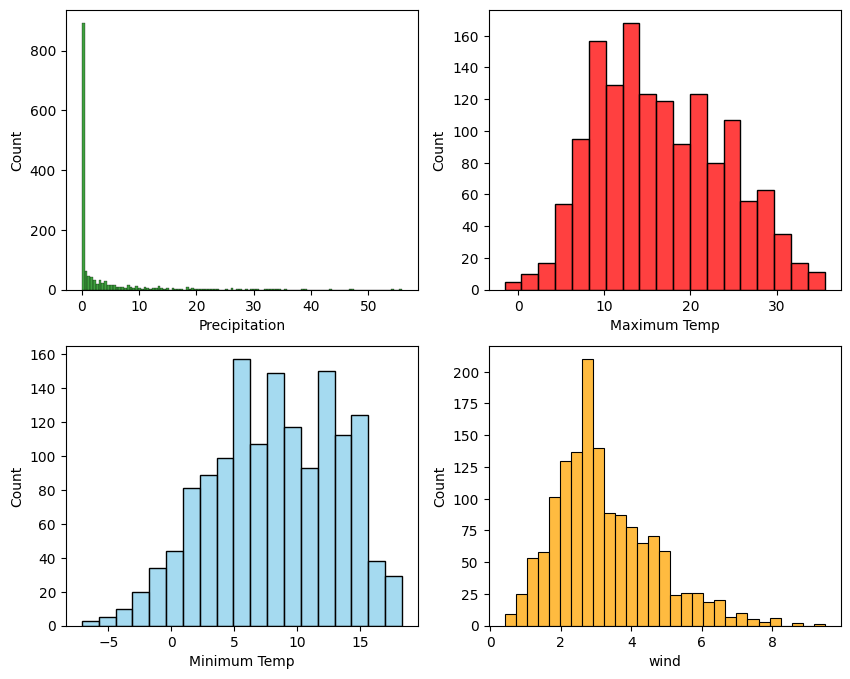

In [39]:
fig,axs=plt.subplots(2,2,figsize=(10,8))
seaborn.histplot(data=data,x="Precipitation",ax=axs[0,0],color='green')
seaborn.histplot(data=data,x="Maximum Temp",ax=axs[0,1],color='red')
seaborn.histplot(data=data,x="Minimum Temp",ax=axs[1,0],color='skyblue')
seaborn.histplot(data=data,x="wind",ax=axs[1,1],color='orange')

<AxesSubplot: xlabel='Precipitation'>

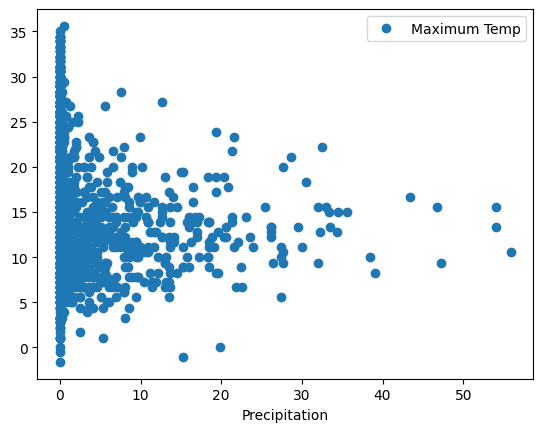

In [40]:
data.plot("Precipitation","Maximum Temp",style='o') 

<AxesSubplot: xlabel='wind'>

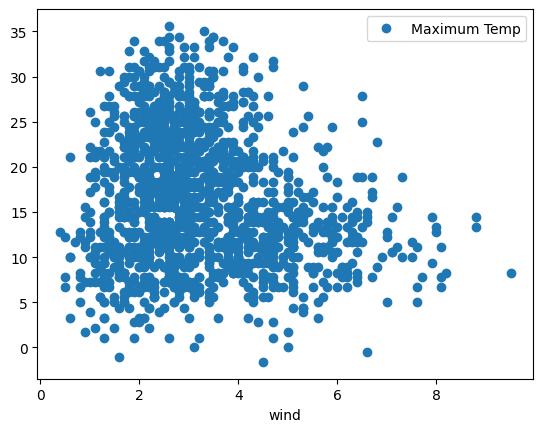

In [41]:
data.plot("wind","Maximum Temp",style='o') 


<AxesSubplot: xlabel='Minimum Temp'>

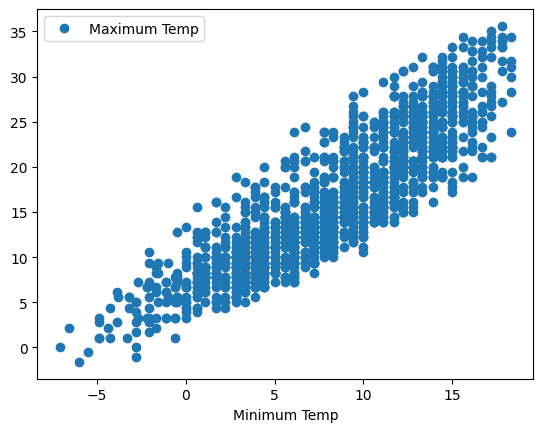

In [42]:
data.plot("Minimum Temp","Maximum Temp",style='o') 

**DROPPING UNNECESSARY VARIABLES**
Date is an unnecessary variable...

In [43]:
df=data.drop(["Date"],axis=1)
df.head()
df.Precipitation=numpy.sqrt(df.Precipitation)
df.wind=numpy.sqrt(df.wind)
df.head()

,Precipitation,Maximum Temp,Minimum Temp,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
1,3.301515,10.6,2.8,2.121320,rain
2,0.894427,11.7,7.2,1.516575,rain
3,4.505552,12.2,5.6,2.167948,rain
4,1.140175,8.9,2.8,2.469818,rain


In [44]:
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])
df.head()

,Precipitation,Maximum Temp,Minimum Temp,wind,weather
0,0.000000,12.8,5.0,2.167948,0
1,3.301515,10.6,2.8,2.121320,2
2,0.894427,11.7,7.2,1.516575,2
3,4.505552,12.2,5.6,2.167948,2
4,1.140175,8.9,2.8,2.469818,2


### **TRAINING THE DATA**

In [45]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

**SUPPORT VECTOR MACHINE - CLASSIFIER:**

In [46]:
fun = SVC()
fun.fit(x_train, y_train)
y_pred = fun.predict(x_test)
fun.fit(x_train,y_train)
print("SVM Accuracy:",(fun.score(x_test,y_test)*100),"%")

SVM Accuracy: 79.59183673469387 %


### **PREDICTING USING USER'S INPUT**

In [47]:
precip = float(input("Enter Precipitaion"))
max_t = float(input("Enter Maximum Temperature"))
min_t = float(input("Enter Minimum Temperature"))
wind = float(input("Enter Wind Speed"))
# dat=[[1.140175,8.9,2.8,2.469818]]  #Precipitation, Max Temp, Min Temp, wind speed
dat = [[precip, max_t, min_t, wind]]
ot=fun.predict(dat)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

The weather is:
Rain
